In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd

In [66]:
# code for integrations stuff
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/integration/82_patients/merged_integration_results_82_patients.txt', 
                 sep='\t')

In [52]:
df.describe()

,patient,virus,integrated,chromosome,DNA_lib,DNA_details,RNA_lib,RNA_details
count,185,185,185,185,185,185,185,185
unique,78,20,2,24,78,84,78,114
top,HTMCP-03-06-02175,Human papillomavirus type 16,YES,-,A52324,not_detected_in_DNA,A52350,detected_but_not_integrated_in_RNA
freq,15,66,140,45,15,81,15,61


In [67]:
# df_integrated = df[(df["DNA_details"] != "not_detected_in_DNA") & 
#    (df["RNA_details"] != "not_detected_in_RNA") &
#     (df["integrated"] == "YES")]

In [84]:
df_integrated = df[df["integrated"] == "YES"]

In [86]:
df_integrated.describe()

,patient,virus,integrated,chromosome,DNA_lib,DNA_details,RNA_lib,RNA_details
count,140,140,140,140,140,140,140,140
unique,70,14,1,23,70,84,70,114
top,HTMCP-03-06-02175,Human papillomavirus type 16,YES,1,A52324,not_detected_in_DNA,A52350,detected_but_not_integrated_in_RNA
freq,14,54,140,12,14,47,14,19


In [87]:
def get_genes(string):
    sl = string.split(';')
    genes =set([i.split(',')[1] if len(i.split(',')) >1  else "NA" for i in sl ])
    return genes

In [88]:
df_integrated["DNA_details_modified"] = df_integrated["DNA_details"].apply(get_genes)

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
df_integrated["RNA_details_modified"] = df_integrated["RNA_details"].apply(get_genes)

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
genes = []
for f in df_integrated["RNA_details_modified"]:
    for i in f:
#         print i, "\n"
        genes.append(i)
genes = set(genes)
print genes
    
rna_genes = genes

set(['RNA5-8S5', 'KIAA1958', 'FHIT', 'BC042052', 'SMIM19', 'STK11', 'BC037497', 'CD5', 'SERHL2', 'CLTA', 'RAD51B', 'FAM83B', 'ELF1', 'GPR137B', 'ACSL5', 'COL4A5', 'MIEN1', 'BC066991', 'FNBP1L', 'TP63', 'DLG2', 'RASEF', 'PKD1L1', 'IRS1', 'AK127472', 'NA', 'TBC1D3', 'MIB1', 'UPK1B', 'CDC42SE1', 'LRP1B', 'RNF103-CHMP3', 'PRIM2', 'FGF12', 'RREB1', 'CDH5', 'B4GALT4', 'HINT1', 'ERBB2', 'MAML3', 'KRT32', 'C12orf44', 'PRUNE', 'LY86-AS1', 'SCAF11', 'ARID2', 'NR4A1', 'KRT26', 'CEACAM6', 'LOC440434', 'MLLT11', 'KLF12', 'SUGT1P3', 'CT64', 'KCNN3', 'TMEM242', 'TUBD1', 'HV975509', 'RASSF6', 'CLPTM1L', 'RMND5A', 'BEAN1', 'SLC20A2', 'VARS', 'PTPN13', 'intergenic', 'ANKFN1', 'LOC646762', 'CRTC3', 'RAB40B', 'THADA', 'GUCY2GP', 'IRS4', 'DQ515899', 'ELOVL2', 'TPTE2P5', 'LYRM7', 'WBP4', 'MPPED2', 'bpl'])


In [93]:
genes = []
for f in df_integrated["DNA_details_modified"]:
    for i in f:
#         print i, "\n"
        genes.append(i)
genes = set(genes)
print genes
dna_genes = genes

set(['MYO9A', 'RNA5-8S5', 'STK19', 'BC042052', 'AK057471', 'RAD51B', 'BCL11B', 'BMPR1A', 'CLTA', 'RNF38', 'ELF1', 'GPR137B', 'IGSF11', 'POLH', 'THSD7B', 'DLG2', 'TMEM126B', 'FAM157B', 'SLC22A23', 'NA', 'UPK1B', 'CDC42SE1', 'LRP1B', 'DGKI', 'LRRFIP1', 'PHYH', 'B4GALT4', 'ERBB2', 'RPTOR', 'BC012753', 'LY86-AS1', 'RAB40B', 'THSD4', 'SEPHS1', 'SENP2', 'COG5', 'CROCC', 'SUGT1P3', 'SNRPN', 'MAML3', 'DDC', 'GRAMD1B', 'AK127472', 'C12orf44', 'ABCC10', 'SEMA3D', 'AZI1', 'NCK1', 'VARS', 'IMPG1', 'PTPN13', 'intergenic', 'bpl', 'SPAG16', 'THADA', 'CYP27A1', 'HS6ST2', 'DQ515899', 'Metazoa_SRP', 'LOC100132167', 'MGAT4C', 'PKHD1', 'COL6A3', 'PAK1'])


In [18]:
# genes in rna or dna
# for i in set (rna_genes|dna_genes):
#     print i
    

In [19]:
# genes  in rna AND dna
# for i in set (rna_genes&dna_genes):
#     print i
    

In [103]:
df_integrated.head()

,patient,virus,integrated,chromosome,DNA_lib,DNA_details,RNA_lib,RNA_details,DNA_details_modified,RNA_details_modified
0,HTMCP-03-06-02001,Human papillomavirus type 16,YES,3,A37234,not_detected_in_DNA,A37700,"3_189526056,TP63;3_189526059,TP63;3_189526315,...",{NA},{TP63}
1,HTMCP-03-06-02002,Human papillomavirus type 52,YES,22,A37235,not_detected_in_DNA,A37701,"22_43161525,intergenic;22_43161526,intergenic;...",{NA},{intergenic}
2,HTMCP-03-06-02003,Human papillomavirus type 16,YES,11,A37236,detected_but_not_integrated_in_DNA,A37702,"11_60882522,CD5;11_60935033,intergenic",{NA},"{CD5, intergenic}"
4,HTMCP-03-06-02006,Human papillomavirus type 45,YES,12,A37239,not_detected_in_DNA,A37704,"12_46287201,ARID2;12_46328672,SCAF11;12_463299...",{NA},"{ARID2, SCAF11}"
5,HTMCP-03-06-02008,Human papillomavirus type 9,YES,9,A37241,not_detected_in_DNA,A37706,"9_115288280,KIAA1958",{NA},{KIAA1958}


In [16]:
df["DNA_details"]

0                                    not_detected_in_DNA
1                                    not_detected_in_DNA
2                     detected_but_not_integrated_in_DNA
3                                    not_detected_in_DNA
4                                    not_detected_in_DNA
5                                    not_detected_in_DNA
6                                    not_detected_in_DNA
7                     detected_but_not_integrated_in_DNA
8                                    not_detected_in_DNA
9                                 17_36310359,intergenic
10                     integrated_in_DNA_but_not_on_chr6
11                                   not_detected_in_DNA
12                                   not_detected_in_DNA
13                                   not_detected_in_DNA
14                                   not_detected_in_DNA
15                                   not_detected_in_DNA
16                                   not_detected_in_DNA
17                             

In [3]:
# {k: list(v) for k,v in df.groupby("patient")["virus"] if len(list(v)) >1}
# number of patient with multiple HPV strains
patient_multiple_strains = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) >1]
print(len(patient_multiple_strains))
patient_1_strain = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) ==1]
print(len(patient_1_strain))

num_viruses = {k: len(set(list(v))) for k,v in df.groupby("patient")["virus"]}

46
32


In [4]:
df.head()

,patient,virus,integrated,chromosome,DNA_lib,DNA_details,RNA_lib,RNA_details
0,HTMCP-03-06-02001,Human papillomavirus type 16,YES,3,A37234,not_detected_in_DNA,A37700,"3_189526056,TP63;3_189526059,TP63;3_189526315,..."
1,HTMCP-03-06-02002,Human papillomavirus type 52,YES,22,A37235,not_detected_in_DNA,A37701,"22_43161525,intergenic;22_43161526,intergenic;..."
2,HTMCP-03-06-02003,Human papillomavirus type 16,YES,11,A37236,detected_but_not_integrated_in_DNA,A37702,"11_60882522,CD5;11_60935033,intergenic"
3,HTMCP-03-06-02006,Human papillomavirus type 18,NO,-,A37239,not_detected_in_DNA,A37704,detected_but_not_integrated_in_RNA
4,HTMCP-03-06-02006,Human papillomavirus type 45,YES,12,A37239,not_detected_in_DNA,A37704,"12_46287201,ARID2;12_46328672,SCAF11;12_463299..."


In [51]:
for patient in sorted(num_viruses):
    print patient, "\t", num_viruses[patient]

HTMCP-03-06-02001 	1
HTMCP-03-06-02002 	1
HTMCP-03-06-02003 	1
HTMCP-03-06-02006 	2
HTMCP-03-06-02008 	2
HTMCP-03-06-02012 	5
HTMCP-03-06-02013 	1
HTMCP-03-06-02020 	2
HTMCP-03-06-02036 	1
HTMCP-03-06-02037 	1
HTMCP-03-06-02040 	1
HTMCP-03-06-02042 	1
HTMCP-03-06-02046 	2
HTMCP-03-06-02047 	1
HTMCP-03-06-02054 	1
HTMCP-03-06-02057 	1
HTMCP-03-06-02058 	1
HTMCP-03-06-02061 	1
HTMCP-03-06-02063 	1
HTMCP-03-06-02068 	2
HTMCP-03-06-02070 	3
HTMCP-03-06-02071 	1
HTMCP-03-06-02074 	1
HTMCP-03-06-02075 	1
HTMCP-03-06-02076 	1
HTMCP-03-06-02089 	2
HTMCP-03-06-02092 	2
HTMCP-03-06-02097 	3
HTMCP-03-06-02098 	2
HTMCP-03-06-02099 	1
HTMCP-03-06-02103 	3
HTMCP-03-06-02108 	1
HTMCP-03-06-02109 	1
HTMCP-03-06-02110 	2
HTMCP-03-06-02113 	1
HTMCP-03-06-02120 	2
HTMCP-03-06-02125 	1
HTMCP-03-06-02128 	1
HTMCP-03-06-02139 	1
HTMCP-03-06-02144 	1
HTMCP-03-06-02145 	3
HTMCP-03-06-02147 	1
HTMCP-03-06-02148 	1
HTMCP-03-06-02149 	4
HTMCP-03-06-02150 	1
HTMCP-03-06-02151 	1
HTMCP-03-06-02152 	1
HTMCP-03-06-0

In [29]:
# code for variants stuff
var_df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_SNV_summary_with_normal_82_patients.filtered.somatic.txt', 
                 sep='\t')
# print(var_df.head())

     gene  filtered_num_patients_gene_level  filtered_num_SNVs_gene_level  \
0  UBE2Q1                                 1                             1   
1  DUOXA1                                 2                             2   
2  DUOXA1                                 2                             2   
3  UBE2Q2                                 1                             1   
4   RNF10                                 3                             3   

   num_patients_gene_level  num_SNVs_gene_level chromosome   position  \
0                        3                    2          1  154530861   
1                       65                    9         15   45412938   
2                       65                    9         15   45415069   
3                       82                    3         15   76171485   
4                        8                    7         12  120984215   

  ref_base alt_base  filtered_num_patients_SNV_level  ...    t_RNA_cov  \
0        C        A     

In [48]:
var_df.groupby("patient_ID")["gene"]
num_variants = {k: len(set(list(v))) for k,v in var_df.groupby("patient_ID")["gene"]}
for patient in sorted(num_variants):
    print patient, "\t", num_variants[patient]

HTMCP-03-06-02001_malignant 	247
HTMCP-03-06-02002_malignant 	180
HTMCP-03-06-02003_malignant 	86
HTMCP-03-06-02006_malignant 	207
HTMCP-03-06-02007_malignant 	8568
HTMCP-03-06-02008_malignant 	91
HTMCP-03-06-02012_malignant 	365
HTMCP-03-06-02013_malignant 	97
HTMCP-03-06-02020_malignant 	170
HTMCP-03-06-02026_malignant 	4414
HTMCP-03-06-02036_malignant 	79
HTMCP-03-06-02037_malignant 	103
HTMCP-03-06-02040_malignant 	168
HTMCP-03-06-02042_malignant 	285
HTMCP-03-06-02046_malignant 	42
HTMCP-03-06-02047_malignant 	84
HTMCP-03-06-02054_malignant 	178
HTMCP-03-06-02057_malignant 	76
HTMCP-03-06-02058_malignant 	1148
HTMCP-03-06-02061_malignant 	295
HTMCP-03-06-02063_malignant 	1482
HTMCP-03-06-02068_malignant 	432
HTMCP-03-06-02070_malignant 	152
HTMCP-03-06-02071_malignant 	72
HTMCP-03-06-02074_malignant 	130
HTMCP-03-06-02075_malignant 	323
HTMCP-03-06-02076_malignant 	145
HTMCP-03-06-02085_malignant 	77
HTMCP-03-06-02089_malignant 	179
HTMCP-03-06-02092_malignant 	121
HTMCP-03-06-020

In [47]:
num_variants = {k: set(list(v)) for k,v in var_df.groupby("patient_ID")["gene"]}
genes = ["PIK3CA", "HLA-B", "HLA-A", "FBXW7", "EP300", "ERBB2", "NFE2L2", "ARID1A", "CASP8", "ERBB3", "KRAS", "PTEN","TGFBR2", "MAPK1", "MED1"]
print '\t'.join(genes)
for patient in sorted(num_variants):
    statuses = []
    for gene in genes:  
        if gene in num_variants[patient]:
            aa = "Yes"
        else: 
            aa = "No"        
        statuses.append(aa)
    print patient, "\t", '\t'.join(statuses)



PIK3CA	HLA-B	HLA-A	FBXW7	EP300	ERBB2	NFE2L2	ARID1A	CASP8	ERBB3	KRAS	PTEN	TGFBR2	MAPK1	MED1
HTMCP-03-06-02001_malignant 	Yes	No	No	No	Yes	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02002_malignant 	Yes	No	Yes	No	No	No	Yes	No	No	No	No	No	No	No	No
HTMCP-03-06-02003_malignant 	No	No	Yes	No	No	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02006_malignant 	No	No	No	Yes	No	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02007_malignant 	Yes	Yes	Yes	Yes	Yes	No	No	Yes	Yes	Yes	Yes	Yes	Yes	No	No
HTMCP-03-06-02008_malignant 	No	No	Yes	No	No	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02012_malignant 	Yes	No	No	No	No	No	Yes	No	Yes	No	No	No	No	No	No
HTMCP-03-06-02013_malignant 	Yes	No	No	No	No	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02020_malignant 	No	No	No	No	No	No	No	No	No	No	No	No	No	No	No
HTMCP-03-06-02026_malignant 	Yes	No	No	Yes	No	Yes	No	Yes	Yes	No	Yes	Yes	Yes	Yes	No
HTMCP-03-06-02036_malignant 	Yes	No	No	No	No	No	No	No	Yes	No	No	No	No	No	No
HTMCP-03-06-02037_malignant 	No	No	Yes	No	No	No	No	No	No	No	Y

In [5]:
[k for k in patient_1_strain]

['HTMCP-03-06-02001',
 'HTMCP-03-06-02002',
 'HTMCP-03-06-02003',
 'HTMCP-03-06-02013',
 'HTMCP-03-06-02036',
 'HTMCP-03-06-02037',
 'HTMCP-03-06-02040',
 'HTMCP-03-06-02042',
 'HTMCP-03-06-02057',
 'HTMCP-03-06-02061',
 'HTMCP-03-06-02074',
 'HTMCP-03-06-02099',
 'HTMCP-03-06-02113',
 'HTMCP-03-06-02125',
 'HTMCP-03-06-02139',
 'HTMCP-03-06-02144',
 'HTMCP-03-06-02148',
 'HTMCP-03-06-02150',
 'HTMCP-03-06-02151',
 'HTMCP-03-06-02152',
 'HTMCP-03-06-02155',
 'HTMCP-03-06-02194',
 'HTMCP-03-06-02196',
 'HTMCP-03-06-02203',
 'HTMCP-03-06-02204',
 'HTMCP-03-06-02209',
 'HTMCP-03-06-02210',
 'HTMCP-03-06-02214',
 'HTMCP-03-06-02215',
 'HTMCP-03-06-02216',
 'HTMCP-03-06-02235',
 'HTMCP-03-06-02242']

In [ ]:
# # code for integrations stuff
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import style

# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/integration/82_patients/merged_integration_results_82_patients.txt', 
#                  sep='\t')
# # subset data based on a column value 
# # df_4BN =df.loc[(df.patient_ID=='AML-16626_Xengraft-16-4BN'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]


# # print(df.head())
# # {k: list(v) for k,v in df.groupby("patient")["virus"] if len(list(v)) >1}
# # number of patient with multiple HPV strains
# patient_multiple_strains = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) >1]
# print(len(patient_multiple_strains))
# patient_1_strain = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) ==1]
# print(len(patient_1_strain))

# [k for k in patient_1_strain]

In [27]:
# code for exon expression stuff
df = pd.read_csv('/projects/wtsspipeline/analysis/A37708/coverage/hg19a_jg-e69_bwa-mem-0.7.6a/ensembl_homo_sapiens_core_69_37/production_v1.1/stranded/A37708_1_lanes.stranded_collapsed_coverage.exon.normalized', 
                 sep='\t',
                header=None)

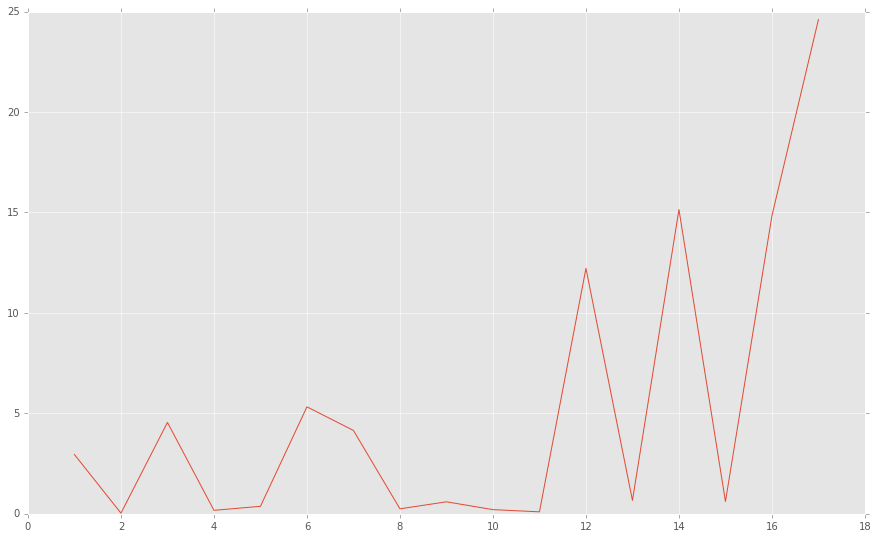

In [28]:
# FHIT= ENSG00000189283
# integration site exon 6-16
df = df[df[0]=='ENSG00000189283']
plt.plot(df[3], df[11])

In [ ]:
plt.plot(df[3], df[11])

In [25]:
df = pd.read_csv('/projects/wtsspipeline/analysis/A37734/coverage/hg19a_jg-e69_bwa-mem-0.7.6a/ensembl_homo_sapiens_core_69_37/production_v1.1/stranded/A37734_1_lanes.stranded_collapsed_coverage.exon.normalized', sep='\t', header=None)

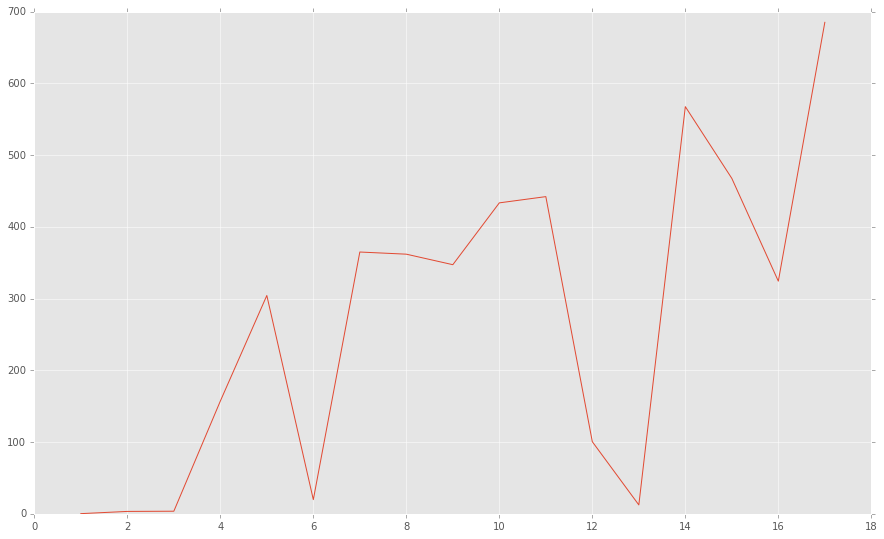

In [17]:
# TP63=ENSG00000073282
# integration site exon 17
df = df[df[0]=='ENSG00000073282']
plt.plot(df[3], df[11])

In [19]:
df = pd.read_csv('/projects/wtsspipeline/analysis/A37700/coverage/hg19a_jg-e69_bwa-mem-0.7.6a/ensembl_homo_sapiens_core_69_37/production_v1.1/stranded/A37700_1_lanes.stranded_collapsed_coverage.exon.normalized', sep='\t', header=None)

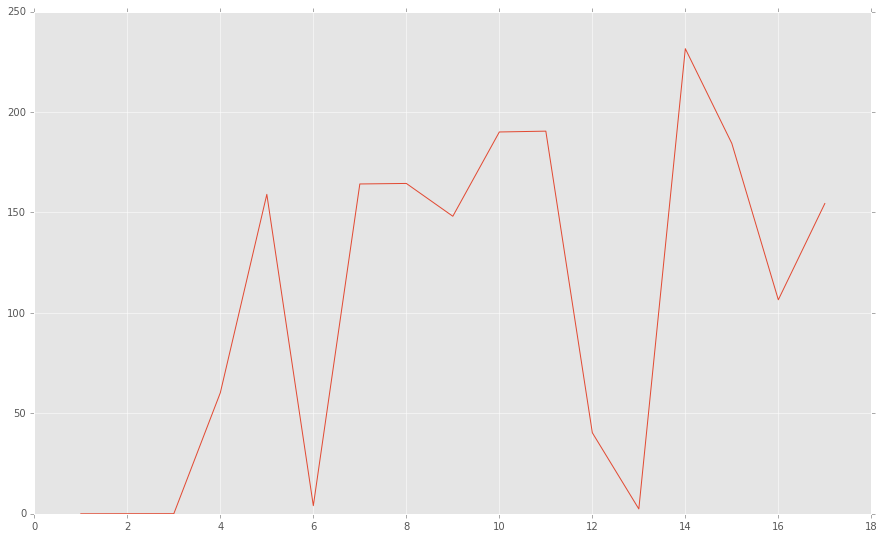

In [20]:
# TP63=ENSG00000073282
# ingetration site exon 5
df = df[df[0]=='ENSG00000073282']
plt.plot(df[3], df[11])

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


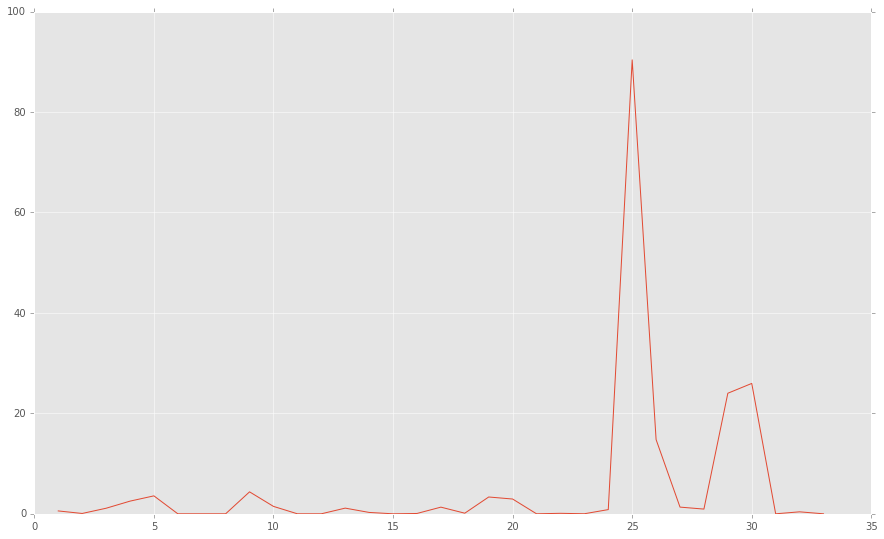

In [114]:
# RAD51B=ENSG00000182185
# integration site exon 25-30
df = pd.read_csv('/projects/wtsspipeline/analysis/A52360/coverage/hg19a_jg-e69_bwa-mem-0.7.6a/ensembl_homo_sapiens_core_69_37/production_v1.1/stranded/A52360_1_lanes.stranded_collapsed_coverage.exon.normalized',sep='\t', header=None)
df = df[df[0]=='ENSG00000182185']
plt.plot(df[3], df[11])

see if in general FHIT gene exons are in general uniformly expressed

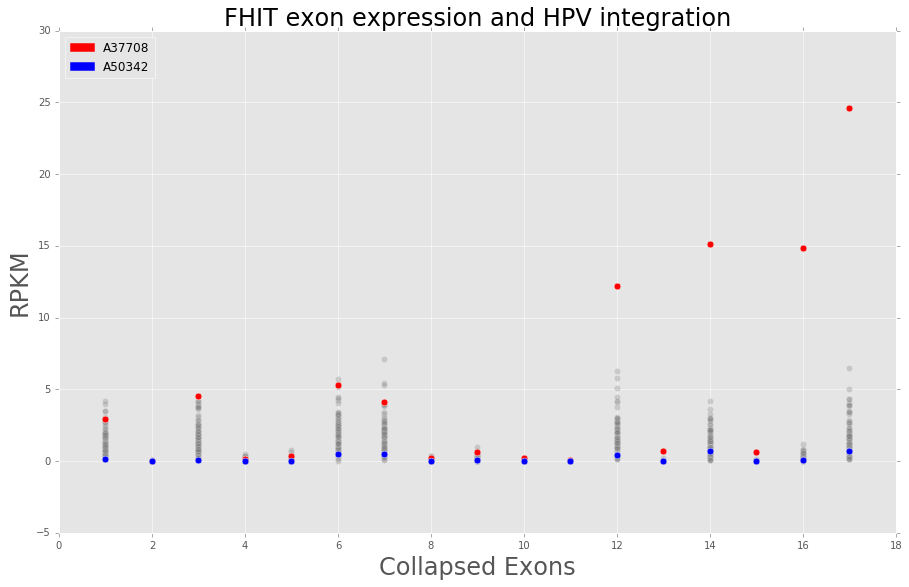

In [100]:
expression_files = ["A37700.FHIT.tmp","A37701.FHIT.tmp","A37702.FHIT.tmp","A37704.FHIT.tmp","A37705.FHIT.tmp","A37706.FHIT.tmp","A37707.FHIT.tmp","A37708.FHIT.tmp","A37710.FHIT.tmp","A37711.FHIT.tmp","A37714.FHIT.tmp","A37715.FHIT.tmp","A37716.FHIT.tmp","A37717.FHIT.tmp","A37718.FHIT.tmp","A37719.FHIT.tmp","A37720.FHIT.tmp","A37721.FHIT.tmp","A37722.FHIT.tmp","A37723.FHIT.tmp","A37724.FHIT.tmp","A37725.FHIT.tmp","A37726.FHIT.tmp","A37727.FHIT.tmp","A37729.FHIT.tmp","A37730.FHIT.tmp","A37731.FHIT.tmp","A37732.FHIT.tmp","A37733.FHIT.tmp","A37734.FHIT.tmp","A37735.FHIT.tmp","A37736.FHIT.tmp","A37737.FHIT.tmp","A37738.FHIT.tmp","A50336.FHIT.tmp","A50337.FHIT.tmp","A50338.FHIT.tmp","A50339.FHIT.tmp","A50340.FHIT.tmp","A50341.FHIT.tmp","A50342.FHIT.tmp","A50343.FHIT.tmp","A50344.FHIT.tmp","A50345.FHIT.tmp","A50346.FHIT.tmp","A52343.FHIT.tmp","A52344.FHIT.tmp","A52345.FHIT.tmp","A52346.FHIT.tmp","A52349.FHIT.tmp","A52350.FHIT.tmp","A52351.FHIT.tmp","A52353.FHIT.tmp","A52354.FHIT.tmp","A52359.FHIT.tmp","A52360.FHIT.tmp","A52362.FHIT.tmp","A52364.FHIT.tmp","A52365.FHIT.tmp","A52366.FHIT.tmp","A52367.FHIT.tmp","A54468.FHIT.tmp","A54469.FHIT.tmp","A54470.FHIT.tmp","A54471.FHIT.tmp","A54473.FHIT.tmp","A54477.FHIT.tmp","A54479.FHIT.tmp","A54480.FHIT.tmp","A57109.FHIT.tmp","A57111.FHIT.tmp","A57112.FHIT.tmp","A57113.FHIT.tmp","A57115.FHIT.tmp","A57116.FHIT.tmp","A57118.FHIT.tmp","A57119.FHIT.tmp","A57120.FHIT.tmp","A57121.FHIT.tmp","A57122.FHIT.tmp","A57123.FHIT.tmp","A57124.FHIT.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)
    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()
df_joined_drop = df_joined.drop(['A37708.FHIT.tmp', 'A50342.FHIT.tmp'], axis=1)
df_joined_drop['x']= df_joined_drop.index
df_joined['x']= df_joined.index

ax = df_joined.plot('x', 'A37708.FHIT.tmp', kind='scatter',color='gray')

for col in df_joined_drop.columns:
    if col!='x':
        df_joined_drop.plot('x',col, ax=ax, kind='scatter', s=36,color='gray', alpha=0.3)
        
df_joined.plot('x', 'A37708.FHIT.tmp', ax=ax, kind='scatter',color='red',s=46)
df_joined.plot('x','A50342.FHIT.tmp', ax=ax, color='blue',s=46,kind='scatter')
ax.set_xlabel('Collapsed Exons', fontsize=24)
ax.set_ylabel('RPKM', fontsize=24)
ax.set_title('FHIT exon expression and HPV integration', fontsize=24)

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

A37708 = mpatches.Patch(color='red', label='A37708')
A50342 = mpatches.Patch(color='blue', label='A50342')

plt.legend(handles=[A37708, A50342], loc=2)
plt.savefig('FHIT_exon_expression_hpv_integration.png', bbox_inches='tight')

plt.show()

In [99]:
# df_joined.ix[12].sort_values()

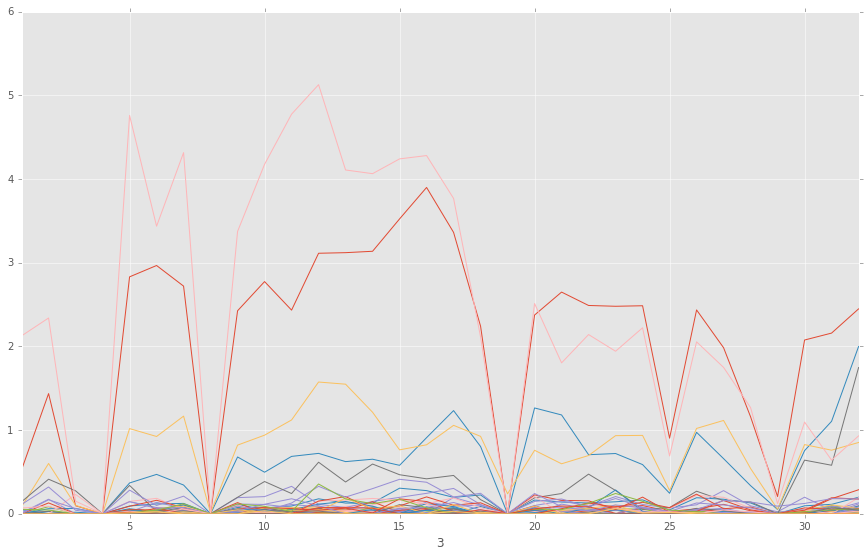

In [83]:
# test if hpv_9 integrated in DNA results in high expression in RNA in HTMCP_02098
# the answer is overall expression are low

expression_files = ["A37700.THSD7B.tmp","A37701.THSD7B.tmp","A37702.THSD7B.tmp","A37704.THSD7B.tmp","A37705.THSD7B.tmp","A37706.THSD7B.tmp","A37707.THSD7B.tmp","A37708.THSD7B.tmp","A37710.THSD7B.tmp","A37711.THSD7B.tmp","A37714.THSD7B.tmp","A37715.THSD7B.tmp","A37716.THSD7B.tmp","A37717.THSD7B.tmp","A37718.THSD7B.tmp","A37719.THSD7B.tmp","A37720.THSD7B.tmp","A37721.THSD7B.tmp","A37722.THSD7B.tmp","A37723.THSD7B.tmp","A37724.THSD7B.tmp","A37725.THSD7B.tmp","A37726.THSD7B.tmp","A37727.THSD7B.tmp","A37729.THSD7B.tmp","A37730.THSD7B.tmp","A37731.THSD7B.tmp","A37732.THSD7B.tmp","A37733.THSD7B.tmp","A37734.THSD7B.tmp","A37735.THSD7B.tmp","A37736.THSD7B.tmp","A37737.THSD7B.tmp","A37738.THSD7B.tmp","A50336.THSD7B.tmp","A50337.THSD7B.tmp","A50338.THSD7B.tmp","A50339.THSD7B.tmp","A50340.THSD7B.tmp","A50341.THSD7B.tmp","A50342.THSD7B.tmp","A50343.THSD7B.tmp","A50344.THSD7B.tmp","A50345.THSD7B.tmp","A50346.THSD7B.tmp","A52343.THSD7B.tmp","A52344.THSD7B.tmp","A52345.THSD7B.tmp","A52346.THSD7B.tmp","A52349.THSD7B.tmp","A52350.THSD7B.tmp","A52351.THSD7B.tmp","A52353.THSD7B.tmp","A52354.THSD7B.tmp","A52359.THSD7B.tmp","A52360.THSD7B.tmp","A52362.THSD7B.tmp","A52364.THSD7B.tmp","A52365.THSD7B.tmp","A52366.THSD7B.tmp","A52367.THSD7B.tmp","A54468.THSD7B.tmp","A54469.THSD7B.tmp","A54470.THSD7B.tmp","A54471.THSD7B.tmp","A54473.THSD7B.tmp","A54477.THSD7B.tmp","A54479.THSD7B.tmp","A54480.THSD7B.tmp","A57109.THSD7B.tmp","A57111.THSD7B.tmp","A57112.THSD7B.tmp","A57113.THSD7B.tmp","A57115.THSD7B.tmp","A57116.THSD7B.tmp","A57118.THSD7B.tmp","A57119.THSD7B.tmp","A57120.THSD7B.tmp","A57121.THSD7B.tmp","A57122.THSD7B.tmp","A57123.THSD7B.tmp","A57124.THSD7B.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()

# df_joined.plot(legend=False)



In [84]:
df_joined.ix[12].sort_values()

A37700.THSD7B.tmp    0.0000
A50338.THSD7B.tmp    0.0000
A57123.THSD7B.tmp    0.0000
A50345.THSD7B.tmp    0.0000
A50346.THSD7B.tmp    0.0000
A52343.THSD7B.tmp    0.0000
A52344.THSD7B.tmp    0.0000
A52345.THSD7B.tmp    0.0000
A52346.THSD7B.tmp    0.0000
A52349.THSD7B.tmp    0.0000
A52350.THSD7B.tmp    0.0000
A52351.THSD7B.tmp    0.0000
A52354.THSD7B.tmp    0.0000
A50337.THSD7B.tmp    0.0000
A52359.THSD7B.tmp    0.0000
A52362.THSD7B.tmp    0.0000
A52365.THSD7B.tmp    0.0000
A52366.THSD7B.tmp    0.0000
A54468.THSD7B.tmp    0.0000
A54471.THSD7B.tmp    0.0000
A54477.THSD7B.tmp    0.0000
A54480.THSD7B.tmp    0.0000
A57112.THSD7B.tmp    0.0000
A57116.THSD7B.tmp    0.0000
A57119.THSD7B.tmp    0.0000
A57121.THSD7B.tmp    0.0000
A57122.THSD7B.tmp    0.0000
A52360.THSD7B.tmp    0.0000
A50336.THSD7B.tmp    0.0000
A50342.THSD7B.tmp    0.0000
                      ...  
A37704.THSD7B.tmp    0.0213
A37714.THSD7B.tmp    0.0214
A37724.THSD7B.tmp    0.0241
A57115.THSD7B.tmp    0.0325
A37730.THSD7B.tmp   

NameError: name 'SLC22A23' is not defined

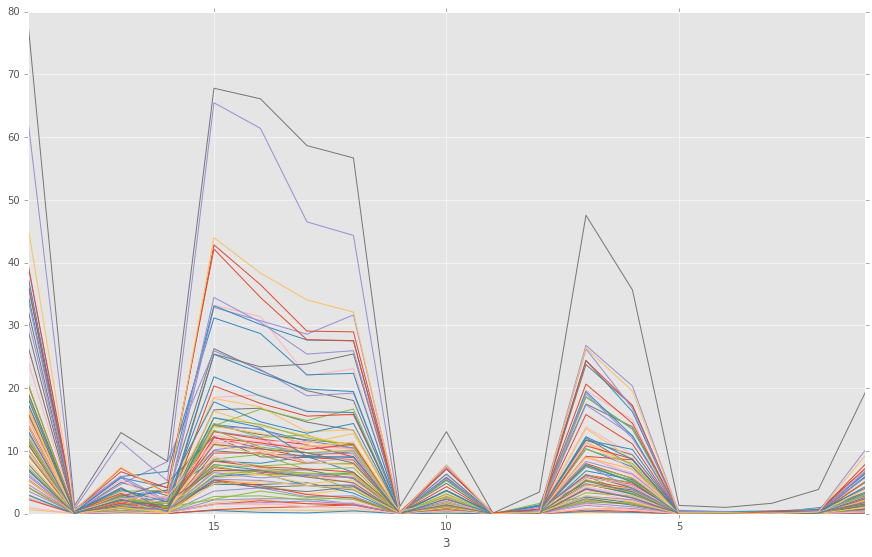

In [60]:
expression_files = ["A37700.SLC22A23.tmp","A37701.SLC22A23.tmp","A37702.SLC22A23.tmp","A37704.SLC22A23.tmp","A37705.SLC22A23.tmp","A37706.SLC22A23.tmp","A37707.SLC22A23.tmp","A37708.SLC22A23.tmp","A37710.SLC22A23.tmp","A37711.SLC22A23.tmp","A37714.SLC22A23.tmp","A37715.SLC22A23.tmp","A37716.SLC22A23.tmp","A37717.SLC22A23.tmp","A37718.SLC22A23.tmp","A37719.SLC22A23.tmp","A37720.SLC22A23.tmp","A37721.SLC22A23.tmp","A37722.SLC22A23.tmp","A37723.SLC22A23.tmp","A37724.SLC22A23.tmp","A37725.SLC22A23.tmp","A37726.SLC22A23.tmp","A37727.SLC22A23.tmp","A37729.SLC22A23.tmp","A37730.SLC22A23.tmp","A37731.SLC22A23.tmp","A37732.SLC22A23.tmp","A37733.SLC22A23.tmp","A37734.SLC22A23.tmp","A37735.SLC22A23.tmp","A37736.SLC22A23.tmp","A37737.SLC22A23.tmp","A37738.SLC22A23.tmp","A50336.SLC22A23.tmp","A50337.SLC22A23.tmp","A50338.SLC22A23.tmp","A50339.SLC22A23.tmp","A50340.SLC22A23.tmp","A50341.SLC22A23.tmp","A50342.SLC22A23.tmp","A50343.SLC22A23.tmp","A50344.SLC22A23.tmp","A50345.SLC22A23.tmp","A50346.SLC22A23.tmp","A52343.SLC22A23.tmp","A52344.SLC22A23.tmp","A52345.SLC22A23.tmp","A52346.SLC22A23.tmp","A52349.SLC22A23.tmp","A52350.SLC22A23.tmp","A52351.SLC22A23.tmp","A52353.SLC22A23.tmp","A52354.SLC22A23.tmp","A52359.SLC22A23.tmp","A52360.SLC22A23.tmp","A52362.SLC22A23.tmp","A52364.SLC22A23.tmp","A52365.SLC22A23.tmp","A52366.SLC22A23.tmp","A52367.SLC22A23.tmp","A54468.SLC22A23.tmp","A54469.SLC22A23.tmp","A54470.SLC22A23.tmp","A54471.SLC22A23.tmp","A54473.SLC22A23.tmp","A54477.SLC22A23.tmp","A54479.SLC22A23.tmp","A54480.SLC22A23.tmp","A57109.SLC22A23.tmp","A57111.SLC22A23.tmp","A57112.SLC22A23.tmp","A57113.SLC22A23.tmp","A57115.SLC22A23.tmp","A57116.SLC22A23.tmp","A57118.SLC22A23.tmp","A57119.SLC22A23.tmp","A57120.SLC22A23.tmp","A57121.SLC22A23.tmp","A57122.SLC22A23.tmp","A57123.SLC22A23.tmp","A57124.SLC22A23.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()

df_joined.plot(legend=False)



In [81]:
df_joined.ix[19].sort_values()


A37737.SLC22A23.tmp     0.6897
A57109.SLC22A23.tmp     1.0140
A37733.SLC22A23.tmp     2.2968
A37711.SLC22A23.tmp     2.5106
A37717.SLC22A23.tmp     2.5515
A37705.SLC22A23.tmp     2.5657
A52350.SLC22A23.tmp     2.9850
A37738.SLC22A23.tmp     3.0561
A52365.SLC22A23.tmp     3.6634
A50337.SLC22A23.tmp     4.2023
A52359.SLC22A23.tmp     4.2733
A37702.SLC22A23.tmp     4.7048
A37715.SLC22A23.tmp     5.3126
A57116.SLC22A23.tmp     5.4533
A52362.SLC22A23.tmp     5.4584
A52343.SLC22A23.tmp     5.5076
A54473.SLC22A23.tmp     6.0366
A50336.SLC22A23.tmp     6.0527
A50346.SLC22A23.tmp     6.3896
A57115.SLC22A23.tmp     6.8962
A50338.SLC22A23.tmp     7.1264
A54480.SLC22A23.tmp     7.4107
A37736.SLC22A23.tmp     7.9517
A52354.SLC22A23.tmp     8.4240
A37718.SLC22A23.tmp     9.3701
A37723.SLC22A23.tmp     9.5928
A52345.SLC22A23.tmp    10.1338
A57119.SLC22A23.tmp    10.1409
A52366.SLC22A23.tmp    10.2296
A37730.SLC22A23.tmp    10.3045
                        ...   
A37710.SLC22A23.tmp    15.7291
A37708.S

NameError: name 'PSMG4' is not defined

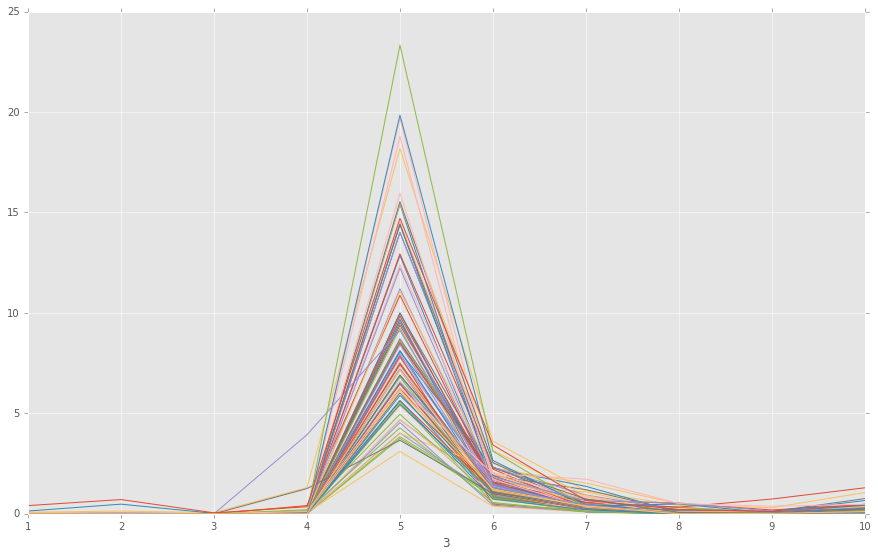

In [85]:
expression_files = ["A37700.PSMG4.tmp","A37701.PSMG4.tmp","A37702.PSMG4.tmp","A37704.PSMG4.tmp","A37705.PSMG4.tmp","A37706.PSMG4.tmp","A37707.PSMG4.tmp","A37708.PSMG4.tmp","A37710.PSMG4.tmp","A37711.PSMG4.tmp","A37714.PSMG4.tmp","A37715.PSMG4.tmp","A37716.PSMG4.tmp","A37717.PSMG4.tmp","A37718.PSMG4.tmp","A37719.PSMG4.tmp","A37720.PSMG4.tmp","A37721.PSMG4.tmp","A37722.PSMG4.tmp","A37723.PSMG4.tmp","A37724.PSMG4.tmp","A37725.PSMG4.tmp","A37726.PSMG4.tmp","A37727.PSMG4.tmp","A37729.PSMG4.tmp","A37730.PSMG4.tmp","A37731.PSMG4.tmp","A37732.PSMG4.tmp","A37733.PSMG4.tmp","A37734.PSMG4.tmp","A37735.PSMG4.tmp","A37736.PSMG4.tmp","A37737.PSMG4.tmp","A37738.PSMG4.tmp","A50336.PSMG4.tmp","A50337.PSMG4.tmp","A50338.PSMG4.tmp","A50339.PSMG4.tmp","A50340.PSMG4.tmp","A50341.PSMG4.tmp","A50342.PSMG4.tmp","A50343.PSMG4.tmp","A50344.PSMG4.tmp","A50345.PSMG4.tmp","A50346.PSMG4.tmp","A52343.PSMG4.tmp","A52344.PSMG4.tmp","A52345.PSMG4.tmp","A52346.PSMG4.tmp","A52349.PSMG4.tmp","A52350.PSMG4.tmp","A52351.PSMG4.tmp","A52353.PSMG4.tmp","A52354.PSMG4.tmp","A52359.PSMG4.tmp","A52360.PSMG4.tmp","A52362.PSMG4.tmp","A52364.PSMG4.tmp","A52365.PSMG4.tmp","A52366.PSMG4.tmp","A52367.PSMG4.tmp","A54468.PSMG4.tmp","A54469.PSMG4.tmp","A54470.PSMG4.tmp","A54471.PSMG4.tmp","A54473.PSMG4.tmp","A54477.PSMG4.tmp","A54479.PSMG4.tmp","A54480.PSMG4.tmp","A57109.PSMG4.tmp","A57111.PSMG4.tmp","A57112.PSMG4.tmp","A57113.PSMG4.tmp","A57115.PSMG4.tmp","A57116.PSMG4.tmp","A57118.PSMG4.tmp","A57119.PSMG4.tmp","A57120.PSMG4.tmp","A57121.PSMG4.tmp","A57122.PSMG4.tmp","A57123.PSMG4.tmp","A57124.PSMG4.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()

df_joined.plot(legend=False)


In [10]:
expression_files = ["A37700.TP63.tmp","A37701.TP63.tmp","A37702.TP63.tmp","A37704.TP63.tmp","A37705.TP63.tmp","A37706.TP63.tmp","A37707.TP63.tmp","A37708.TP63.tmp","A37710.TP63.tmp","A37711.TP63.tmp","A37714.TP63.tmp","A37715.TP63.tmp","A37716.TP63.tmp","A37717.TP63.tmp","A37718.TP63.tmp","A37719.TP63.tmp","A37720.TP63.tmp","A37721.TP63.tmp","A37722.TP63.tmp","A37723.TP63.tmp","A37724.TP63.tmp","A37725.TP63.tmp","A37726.TP63.tmp","A37727.TP63.tmp","A37729.TP63.tmp","A37730.TP63.tmp","A37731.TP63.tmp","A37732.TP63.tmp","A37733.TP63.tmp","A37734.TP63.tmp","A37735.TP63.tmp","A37736.TP63.tmp","A37737.TP63.tmp","A37738.TP63.tmp","A50336.TP63.tmp","A50337.TP63.tmp","A50338.TP63.tmp","A50339.TP63.tmp","A50340.TP63.tmp","A50341.TP63.tmp","A50342.TP63.tmp","A50343.TP63.tmp","A50344.TP63.tmp","A50345.TP63.tmp","A50346.TP63.tmp","A52343.TP63.tmp","A52344.TP63.tmp","A52345.TP63.tmp","A52346.TP63.tmp","A52349.TP63.tmp","A52350.TP63.tmp","A52351.TP63.tmp","A52353.TP63.tmp","A52354.TP63.tmp","A52359.TP63.tmp","A52360.TP63.tmp","A52362.TP63.tmp","A52364.TP63.tmp","A52365.TP63.tmp","A52366.TP63.tmp","A52367.TP63.tmp","A54468.TP63.tmp","A54469.TP63.tmp","A54470.TP63.tmp","A54471.TP63.tmp","A54473.TP63.tmp","A54477.TP63.tmp","A54479.TP63.tmp","A54480.TP63.tmp","A57109.TP63.tmp","A57111.TP63.tmp","A57112.TP63.tmp","A57113.TP63.tmp","A57115.TP63.tmp","A57116.TP63.tmp","A57118.TP63.tmp","A57119.TP63.tmp","A57120.TP63.tmp","A57121.TP63.tmp","A57122.TP63.tmp","A57123.TP63.tmp","A57124.TP63.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined

,A37700.TP63.tmp,A37701.TP63.tmp,A37702.TP63.tmp,A37704.TP63.tmp,A37705.TP63.tmp,A37706.TP63.tmp,A37707.TP63.tmp,A37708.TP63.tmp,A37710.TP63.tmp,A37711.TP63.tmp,...,A57113.TP63.tmp,A57115.TP63.tmp,A57116.TP63.tmp,A57118.TP63.tmp,A57119.TP63.tmp,A57120.TP63.tmp,A57121.TP63.tmp,A57122.TP63.tmp,A57123.TP63.tmp,A57124.TP63.tmp
3,,,,,,,,,,,,,,,,,,,,,
1,0.0000,0.0311,0.0072,0.0000,0.0295,0.0000,0.0000,0.0000,0.0569,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0167
2,0.0360,0.2707,0.3666,0.1331,0.0484,0.2321,0.7982,0.0000,0.5209,0.0000,...,0.0429,0.0741,0.0000,0.0889,0.1471,0.0000,0.1421,0.7174,0.4321,0.0562
3,0.0556,0.3168,0.4295,0.1685,0.1020,0.2134,1.1732,0.0000,0.3722,0.0162,...,0.1004,0.1859,0.0609,0.1328,0.0879,0.0338,0.0633,0.8487,0.3821,0.0759
4,60.2672,132.7404,15.9051,16.7691,1.1193,18.7104,59.0406,26.5310,34.7729,0.0779,...,0.0000,28.8955,3.6562,16.9817,10.8662,0.0000,32.3918,25.3940,11.3045,17.2219
5,159.0247,288.6373,34.4418,44.4791,2.0757,39.3762,147.3647,60.0680,94.8174,0.2559,...,0.4174,80.5180,8.8468,40.5703,25.2678,0.1656,79.9177,72.2965,30.8342,47.1268
6,4.0408,4.0279,0.8804,0.8855,0.0301,1.3203,2.4485,1.3101,2.6392,0.0000,...,0.0000,0.1135,0.0895,0.9697,0.9452,0.0000,1.5165,1.7397,0.9332,1.6301
7,164.1955,330.4543,44.3783,51.1757,2.9379,45.4751,170.1906,70.6198,109.8726,0.1290,...,0.3110,100.3029,11.2225,53.7242,29.7980,0.0049,110.6989,88.0442,44.8169,60.7914
8,164.4552,320.0454,42.9216,47.3571,3.1210,42.1678,159.7668,68.1364,106.0376,0.0845,...,0.1815,89.6459,11.0335,48.0554,28.8639,0.0000,103.5473,75.2654,44.3642,57.2039
9,148.1209,307.5785,38.6055,43.4556,2.0036,44.9222,146.6303,63.4111,97.6531,0.0053,...,0.0730,82.5550,9.9466,46.6392,25.8843,0.0000,96.4385,68.2239,43.5447,54.3217


In [13]:
df_joined['median'] = df_joined.median(axis=1)
df_joined


,A37700.TP63.tmp,A37701.TP63.tmp,A37702.TP63.tmp,A37704.TP63.tmp,A37705.TP63.tmp,A37706.TP63.tmp,A37707.TP63.tmp,A37708.TP63.tmp,A37710.TP63.tmp,A37711.TP63.tmp,...,A57115.TP63.tmp,A57116.TP63.tmp,A57118.TP63.tmp,A57119.TP63.tmp,A57120.TP63.tmp,A57121.TP63.tmp,A57122.TP63.tmp,A57123.TP63.tmp,A57124.TP63.tmp,median
3,,,,,,,,,,,,,,,,,,,,,
1,0.0000,0.0311,0.0072,0.0000,0.0295,0.0000,0.0000,0.0000,0.0569,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0167,0.00000
2,0.0360,0.2707,0.3666,0.1331,0.0484,0.2321,0.7982,0.0000,0.5209,0.0000,...,0.0741,0.0000,0.0889,0.1471,0.0000,0.1421,0.7174,0.4321,0.0562,0.14865
3,0.0556,0.3168,0.4295,0.1685,0.1020,0.2134,1.1732,0.0000,0.3722,0.0162,...,0.1859,0.0609,0.1328,0.0879,0.0338,0.0633,0.8487,0.3821,0.0759,0.13780
4,60.2672,132.7404,15.9051,16.7691,1.1193,18.7104,59.0406,26.5310,34.7729,0.0779,...,28.8955,3.6562,16.9817,10.8662,0.0000,32.3918,25.3940,11.3045,17.2219,19.87045
5,159.0247,288.6373,34.4418,44.4791,2.0757,39.3762,147.3647,60.0680,94.8174,0.2559,...,80.5180,8.8468,40.5703,25.2678,0.1656,79.9177,72.2965,30.8342,47.1268,48.69320
6,4.0408,4.0279,0.8804,0.8855,0.0301,1.3203,2.4485,1.3101,2.6392,0.0000,...,0.1135,0.0895,0.9697,0.9452,0.0000,1.5165,1.7397,0.9332,1.6301,1.15745
7,164.1955,330.4543,44.3783,51.1757,2.9379,45.4751,170.1906,70.6198,109.8726,0.1290,...,100.3029,11.2225,53.7242,29.7980,0.0049,110.6989,88.0442,44.8169,60.7914,63.89720
8,164.4552,320.0454,42.9216,47.3571,3.1210,42.1678,159.7668,68.1364,106.0376,0.0845,...,89.6459,11.0335,48.0554,28.8639,0.0000,103.5473,75.2654,44.3642,57.2039,61.75580
9,148.1209,307.5785,38.6055,43.4556,2.0036,44.9222,146.6303,63.4111,97.6531,0.0053,...,82.5550,9.9466,46.6392,25.8843,0.0000,96.4385,68.2239,43.5447,54.3217,55.99435


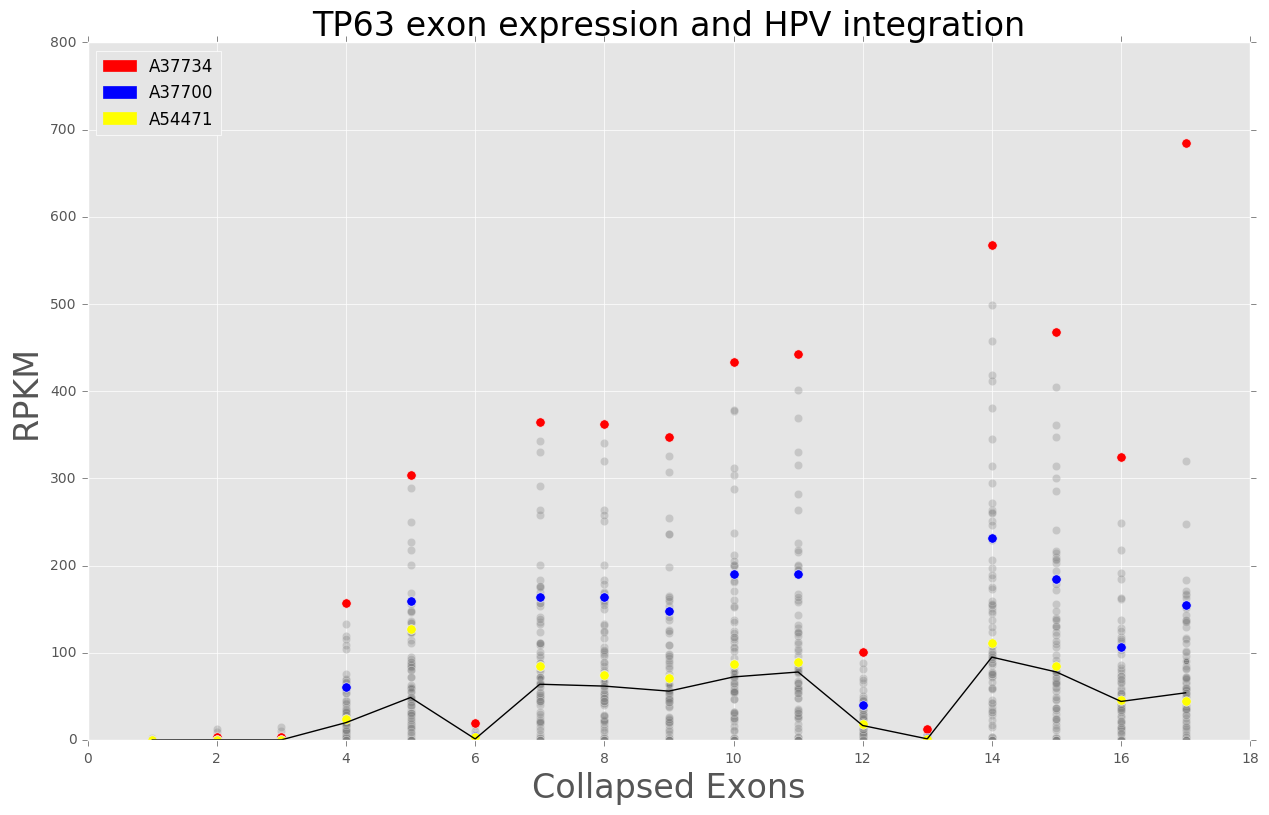

In [17]:
# df_joined.plot(legend=False)
# df_joined[['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp']].plot()




df_joined_drop = df_joined.drop(['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp'], axis=1)
df_joined_drop['x']= df_joined_drop.index
df_joined['x']= df_joined.index

ax = df_joined.plot('x', 'A37708.TP63.tmp', kind='scatter',color='gray')

for col in df_joined_drop.columns:
    if col!='x':
        df_joined_drop.plot('x',col, ax=ax, kind='scatter', s=36,color='gray', alpha=0.3)
        
df_joined.plot('x', 'A37734.TP63.tmp', ax=ax, kind='scatter',color='red',s=46)
df_joined.plot('x','A37700.TP63.tmp', ax=ax, color='blue',s=46,kind='scatter')
df_joined.plot('x','A54471.TP63.tmp', ax=ax, color='yellow',s=46,kind='scatter')

# add median line
df_joined.plot('x','median', ax=ax, color='black')

ax.set_xlabel('Collapsed Exons', fontsize=24)
ax.set_ylabel('RPKM', fontsize=24)
ax.set_xlim(0,18)
ax.set_ylim(0,800)
ax.set_title('TP63 exon expression and HPV integration', fontsize=24)

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

A37734 = mpatches.Patch(color='red', label='A37734')
A37700 = mpatches.Patch(color='blue', label='A37700')
A54471 = mpatches.Patch(color='yellow', label='A54471')

plt.legend(handles=[A37734, A37700, A54471], loc=2)
plt.savefig('TP63_exon_expression_hpv_integration.png', bbox_inches='tight')

plt.show()



# df_joined_drop = df_joined.drop(['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp'], axis=1)
# colors=['lightgray' for i in range(79)]
# ax = df_joined_drop.plot(legend=False,color=colors)
# df_joined[['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp']].plot(ax=ax, title='TP63 exon expression HPV integration')
# plt.xlabel('TP63 exons', fontsize=11)
# plt.ylabel('RPKM', fontsize=11)
# plt.savefig('exon expression.png')

In [115]:
df_joined_drop.describe()


In [95]:

df_joined[['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp']]

,A37734.TP63.tmp,A37700.TP63.tmp,A54471.TP63.tmp
3,,,
1,0.2260,0.0000,0.0023
2,3.3198,0.0360,0.2774
3,3.5990,0.0556,0.2710
4,157.1175,60.2672,24.5908
5,304.3041,159.0247,126.8708
6,19.7494,4.0408,3.2494
7,364.8867,164.1955,84.5386
8,361.8800,164.4552,74.8006
9,347.2219,148.1209,71.5191


In [93]:
df_joined.ix[17].sort_values()

A57120.TP63.tmp      0.0281
A52344.TP63.tmp      0.0336
A57109.TP63.tmp      0.0603
A37711.TP63.tmp      0.0725
A37731.TP63.tmp      0.1187
A37733.TP63.tmp      0.1380
A57113.TP63.tmp      0.1452
A37722.TP63.tmp      0.1741
A52362.TP63.tmp      0.1784
A50338.TP63.tmp      0.2371
A50339.TP63.tmp      0.2630
A54473.TP63.tmp      1.1937
A37705.TP63.tmp      3.2911
A37719.TP63.tmp      3.8137
A57116.TP63.tmp      6.7556
A50336.TP63.tmp     10.5435
A52343.TP63.tmp     12.9173
A57119.TP63.tmp     14.7317
A52366.TP63.tmp     15.8298
A52354.TP63.tmp     19.0221
A54480.TP63.tmp     21.6084
A52365.TP63.tmp     24.6766
A57118.TP63.tmp     28.5016
A50337.TP63.tmp     29.3464
A37702.TP63.tmp     34.4608
A37738.TP63.tmp     34.7827
A57124.TP63.tmp     35.6281
A52346.TP63.tmp     35.7748
A37737.TP63.tmp     36.4197
A37730.TP63.tmp     36.6303
                     ...   
A57111.TP63.tmp     71.3597
A50343.TP63.tmp     72.5717
A50341.TP63.tmp     72.6390
A54470.TP63.tmp     81.7643
A37735.TP63.tmp     

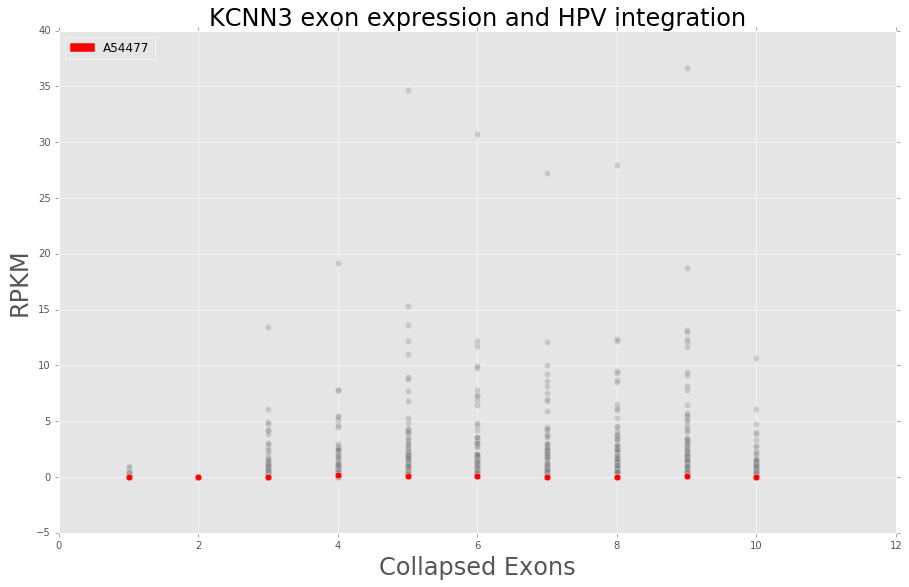

In [106]:
expression_files = ["A37700.KCNN3.tmp","A37701.KCNN3.tmp","A37702.KCNN3.tmp","A37704.KCNN3.tmp","A37705.KCNN3.tmp","A37706.KCNN3.tmp","A37707.KCNN3.tmp","A37708.KCNN3.tmp","A37710.KCNN3.tmp","A37711.KCNN3.tmp","A37714.KCNN3.tmp","A37715.KCNN3.tmp","A37716.KCNN3.tmp","A37717.KCNN3.tmp","A37718.KCNN3.tmp","A37719.KCNN3.tmp","A37720.KCNN3.tmp","A37721.KCNN3.tmp","A37722.KCNN3.tmp","A37723.KCNN3.tmp","A37724.KCNN3.tmp","A37725.KCNN3.tmp","A37726.KCNN3.tmp","A37727.KCNN3.tmp","A37729.KCNN3.tmp","A37730.KCNN3.tmp","A37731.KCNN3.tmp","A37732.KCNN3.tmp","A37733.KCNN3.tmp","A37734.KCNN3.tmp","A37735.KCNN3.tmp","A37736.KCNN3.tmp","A37737.KCNN3.tmp","A37738.KCNN3.tmp","A50336.KCNN3.tmp","A50337.KCNN3.tmp","A50338.KCNN3.tmp","A50339.KCNN3.tmp","A50340.KCNN3.tmp","A50341.KCNN3.tmp","A50342.KCNN3.tmp","A50343.KCNN3.tmp","A50344.KCNN3.tmp","A50345.KCNN3.tmp","A50346.KCNN3.tmp","A52343.KCNN3.tmp","A52344.KCNN3.tmp","A52345.KCNN3.tmp","A52346.KCNN3.tmp","A52349.KCNN3.tmp","A52350.KCNN3.tmp","A52351.KCNN3.tmp","A52353.KCNN3.tmp","A52354.KCNN3.tmp","A52359.KCNN3.tmp","A52360.KCNN3.tmp","A52362.KCNN3.tmp","A52364.KCNN3.tmp","A52365.KCNN3.tmp","A52366.KCNN3.tmp","A52367.KCNN3.tmp","A54468.KCNN3.tmp","A54469.KCNN3.tmp","A54470.KCNN3.tmp","A54471.KCNN3.tmp","A54473.KCNN3.tmp","A54477.KCNN3.tmp","A54479.KCNN3.tmp","A54480.KCNN3.tmp","A57109.KCNN3.tmp","A57111.KCNN3.tmp","A57112.KCNN3.tmp","A57113.KCNN3.tmp","A57115.KCNN3.tmp","A57116.KCNN3.tmp","A57118.KCNN3.tmp","A57119.KCNN3.tmp","A57120.KCNN3.tmp","A57121.KCNN3.tmp","A57122.KCNN3.tmp","A57123.KCNN3.tmp","A57124.KCNN3.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()

# df_joined.plot(legend=False)
# df_joined[['A37734.TP63.tmp', 'A37700.TP63.tmp', 'A54471.TP63.tmp']].plot()




df_joined_drop = df_joined.drop(['A54477.KCNN3.tmp'], axis=1)
df_joined_drop['x']= df_joined_drop.index
df_joined['x']= df_joined.index

ax = df_joined.plot('x', 'A37708.KCNN3.tmp', kind='scatter',color='gray')

for col in df_joined_drop.columns:
    if col!='x':
        df_joined_drop.plot('x',col, ax=ax, kind='scatter', s=36,color='gray', alpha=0.3)
        
df_joined.plot('x', 'A54477.KCNN3.tmp', ax=ax, kind='scatter',color='red',s=46)

ax.set_xlabel('Collapsed Exons', fontsize=24)
ax.set_ylabel('RPKM', fontsize=24)
ax.set_title('KCNN3 exon expression and HPV integration', fontsize=24)

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

A54477 = mpatches.Patch(color='red', label='A54477')


plt.legend(handles=[A54477], loc=2)
plt.savefig('KCNN3_exon_expression_hpv_integration.png', bbox_inches='tight')

plt.show()

In [113]:
df_joined_drop.ix[4].sort_values(ascending=False)

A57116.KCNN3.tmp    19.2138
A57115.KCNN3.tmp     7.8372
A57120.KCNN3.tmp     7.8098
A57121.KCNN3.tmp     5.4430
A52343.KCNN3.tmp     5.3943
A37738.KCNN3.tmp     5.1376
A57123.KCNN3.tmp     4.6703
A37715.KCNN3.tmp     4.4905
x                    4.0000
A54471.KCNN3.tmp     2.9907
A37718.KCNN3.tmp     2.8026
A52362.KCNN3.tmp     2.5137
A52360.KCNN3.tmp     2.5066
A57113.KCNN3.tmp     2.5063
A37737.KCNN3.tmp     2.3772
A37705.KCNN3.tmp     2.3078
A50340.KCNN3.tmp     2.2504
A37725.KCNN3.tmp     2.0038
A37723.KCNN3.tmp     1.9100
A37706.KCNN3.tmp     1.8971
A37714.KCNN3.tmp     1.8151
A37721.KCNN3.tmp     1.7038
A54470.KCNN3.tmp     1.5771
A57112.KCNN3.tmp     1.3730
A52367.KCNN3.tmp     1.2692
A37726.KCNN3.tmp     1.1749
A57119.KCNN3.tmp     1.1658
A52344.KCNN3.tmp     1.1152
A54479.KCNN3.tmp     1.1116
A37717.KCNN3.tmp     1.0974
                     ...   
A54469.KCNN3.tmp     0.5333
A37711.KCNN3.tmp     0.5070
A50343.KCNN3.tmp     0.4965
A52364.KCNN3.tmp     0.4738
A57124.KCNN3.tmp    

In [120]:
expression_files = ["A37700.RAD51B.tmp","A37701.RAD51B.tmp","A37702.RAD51B.tmp","A37704.RAD51B.tmp","A37705.RAD51B.tmp","A37706.RAD51B.tmp","A37707.RAD51B.tmp","A37708.RAD51B.tmp","A37710.RAD51B.tmp","A37711.RAD51B.tmp","A37714.RAD51B.tmp","A37715.RAD51B.tmp","A37716.RAD51B.tmp","A37717.RAD51B.tmp","A37718.RAD51B.tmp","A37719.RAD51B.tmp","A37720.RAD51B.tmp","A37721.RAD51B.tmp","A37722.RAD51B.tmp","A37723.RAD51B.tmp","A37724.RAD51B.tmp","A37725.RAD51B.tmp","A37726.RAD51B.tmp","A37727.RAD51B.tmp","A37729.RAD51B.tmp","A37730.RAD51B.tmp","A37731.RAD51B.tmp","A37732.RAD51B.tmp","A37733.RAD51B.tmp","A37734.RAD51B.tmp","A37735.RAD51B.tmp","A37736.RAD51B.tmp","A37737.RAD51B.tmp","A37738.RAD51B.tmp","A50336.RAD51B.tmp","A50337.RAD51B.tmp","A50338.RAD51B.tmp","A50339.RAD51B.tmp","A50340.RAD51B.tmp","A50341.RAD51B.tmp","A50342.RAD51B.tmp","A50343.RAD51B.tmp","A50344.RAD51B.tmp","A50345.RAD51B.tmp","A50346.RAD51B.tmp","A52343.RAD51B.tmp","A52344.RAD51B.tmp","A52345.RAD51B.tmp","A52346.RAD51B.tmp","A52349.RAD51B.tmp","A52350.RAD51B.tmp","A52351.RAD51B.tmp","A52353.RAD51B.tmp","A52354.RAD51B.tmp","A52359.RAD51B.tmp","A52360.RAD51B.tmp","A52362.RAD51B.tmp","A52364.RAD51B.tmp","A52365.RAD51B.tmp","A52366.RAD51B.tmp","A52367.RAD51B.tmp","A54468.RAD51B.tmp","A54469.RAD51B.tmp","A54470.RAD51B.tmp","A54471.RAD51B.tmp","A54473.RAD51B.tmp","A54477.RAD51B.tmp","A54479.RAD51B.tmp","A54480.RAD51B.tmp","A57109.RAD51B.tmp","A57111.RAD51B.tmp","A57112.RAD51B.tmp","A57113.RAD51B.tmp","A57115.RAD51B.tmp","A57116.RAD51B.tmp","A57118.RAD51B.tmp","A57119.RAD51B.tmp","A57120.RAD51B.tmp","A57121.RAD51B.tmp","A57122.RAD51B.tmp","A57123.RAD51B.tmp","A57124.RAD51B.tmp"]
df_dict = {}
df_joined = pd.DataFrame()
for exp in expression_files:
    df_tmp = pd.read_csv(exp, sep='\t', header=None)


    df_tmp=df_tmp[[3,11]]
    df_tmp.set_index(3, inplace=True)
    df_tmp = df_tmp.rename(columns = {11: exp})
    if df_joined.empty:
         df_joined = df_tmp
    else:
        df_joined = df_joined.join(df_tmp, how='outer')
    df_dict[exp] = df_tmp
    
df_joined.head()

,A37700.RAD51B.tmp,A37701.RAD51B.tmp,A37702.RAD51B.tmp,A37704.RAD51B.tmp,A37705.RAD51B.tmp,A37706.RAD51B.tmp,A37707.RAD51B.tmp,A37708.RAD51B.tmp,A37710.RAD51B.tmp,A37711.RAD51B.tmp,...,A57113.RAD51B.tmp,A57115.RAD51B.tmp,A57116.RAD51B.tmp,A57118.RAD51B.tmp,A57119.RAD51B.tmp,A57120.RAD51B.tmp,A57121.RAD51B.tmp,A57122.RAD51B.tmp,A57123.RAD51B.tmp,A57124.RAD51B.tmp
3,,,,,,,,,,,,,,,,,,,,,
1,0.1510,0.2775,0.7664,0.3714,0.5225,0.2536,0.4839,0.2583,0.2880,0.1473,...,0.2924,0.3393,0.0000,0.4452,0.3604,0.1736,0.1596,0.7530,0.0000,0.5367
2,0.0000,0.0159,0.0869,0.0367,0.0405,0.1234,0.0000,0.0778,0.0378,0.0564,...,0.0723,0.0441,0.0000,0.0215,0.0852,0.0000,0.0785,0.0000,0.0000,0.0000
3,1.1686,0.5615,1.9011,0.5040,0.6376,1.0233,0.8931,0.9181,0.5742,0.3993,...,0.3151,1.6251,0.3509,0.6779,0.3895,0.6119,0.6836,1.8525,0.4144,0.5953
4,2.7685,2.0584,4.4978,0.9202,1.8080,2.5741,2.3598,2.3020,2.1093,1.2940,...,1.1397,3.2272,0.5610,1.5999,2.1274,0.9310,1.5968,3.9104,1.0704,2.6834
5,2.4609,3.6847,6.2796,2.2771,2.5469,3.9797,3.9094,3.0800,3.6661,2.0992,...,1.4420,5.4421,1.0118,1.9992,3.4827,1.6871,2.2150,5.6650,2.6534,4.2823


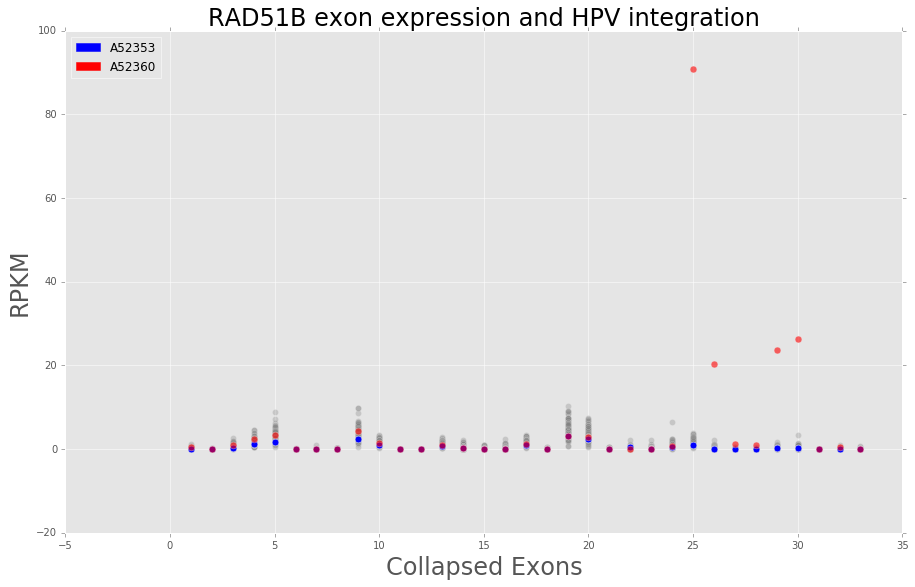

In [127]:
# df_joined.plot(legend=False)
# df_joined[['A52353.RAD51B.tmp', 'A52360.RAD51B.tmp', 'A54469.RAD51B.tmp']].plot()




df_joined_drop = df_joined.drop(['A52353.RAD51B.tmp', 'A52360.RAD51B.tmp'], axis=1)
df_joined_drop['x']= df_joined_drop.index
df_joined['x']= df_joined.index

ax = df_joined.plot('x', 'A37708.RAD51B.tmp', kind='scatter',color='gray')

for col in df_joined_drop.columns:
    if col!='x':
        df_joined_drop.plot('x',col, ax=ax, kind='scatter', s=36,color='gray', alpha=0.3)
        
df_joined.plot('x', 'A52353.RAD51B.tmp', ax=ax, kind='scatter',color='blue',s=46)
df_joined.plot('x','A52360.RAD51B.tmp', ax=ax, color='red',s=46,kind='scatter', alpha=0.6)

ax.set_xlabel('Collapsed Exons', fontsize=24)
ax.set_ylabel('RPKM', fontsize=24)
ax.set_title('RAD51B exon expression and HPV integration', fontsize=24)

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

A52353 = mpatches.Patch(color='blue', label='A52353')
A52360 = mpatches.Patch(color='red', label='A52360')

plt.legend(handles=[A52353, A52360], loc=2)
plt.savefig('RAD51B_exon_expression_hpv_integration.png', bbox_inches='tight')

plt.show()